# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 29.11.2024

Мягий дедлайн: 23:59 11.12.2024

Жестокий дедлайн: 23:59 13.12.2024

### О задании

Задание состоит из трёх разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево для классификации и сравните его со стандартное имплементацией из sklearn.
3. В третьем разделе вы сделаете решающее дерево для регрессии, в листьях которого линейные модели.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 12.5 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест [https://contest.yandex.ru/contest/72492] нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__

In [202]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set_style(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим три простых двумерных датасета сделанных с помощью `make_moons`, `make_circles`, `make_classification` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [203]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0, )
]

In [204]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

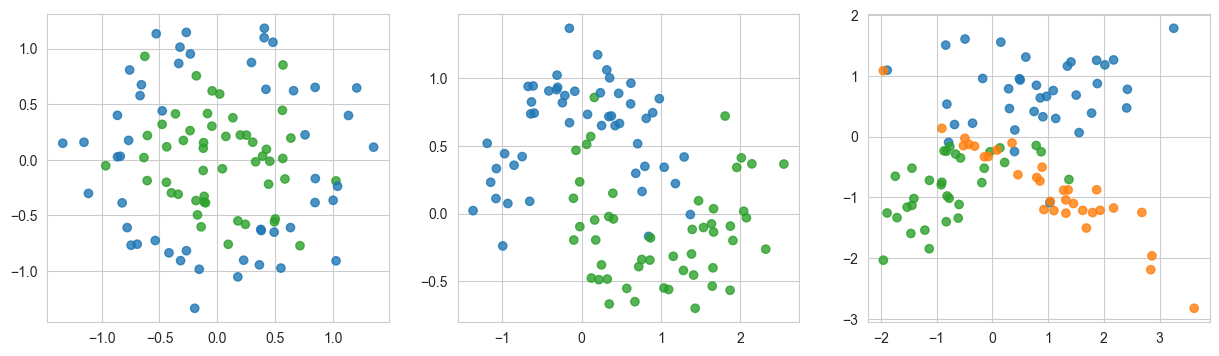

In [205]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [206]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

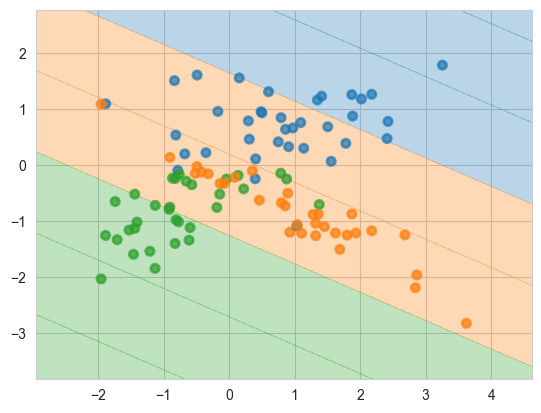

In [207]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

датасет 1: accuracy train = 1.0
датасет 1: accuracy test = 0.6333333333333333
датасет 2: accuracy train = 1.0
датасет 2: accuracy test = 0.8
датасет 3: accuracy train = 1.0
датасет 3: accuracy test = 0.7


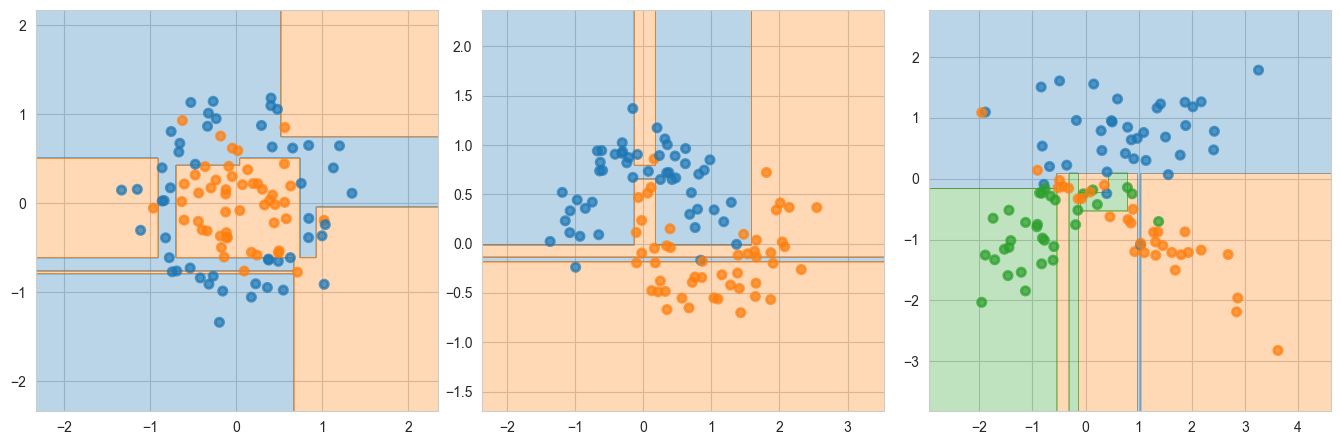

In [208]:
from sklearn.metrics import accuracy_score
fig, axes = plt.subplots(1, 3, figsize=(14, 5))
for i in range(3):
    X, y = datasets[i]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=52)
    tree = DecisionTreeClassifier()
    tree.fit(X_train, y_train)
    y_pred_train = tree.predict(X_train)
    y_pred_test = tree.predict(X_test)
    print(f'датасет {i+1}: accuracy train = {accuracy_score(y_train, y_pred_train)}')
    print(f'датасет {i+1}: accuracy test = {accuracy_score(y_test, y_pred_test)}')
    plt.sca(axes[i])
    plot_surface(tree, X, y)
    

__Ответ:__ Да, деревья сильно переобучились, так как метрики на тесте максимальные а на трейне заметно меньше, особенно в 1 и во 2 случаях 

__Задание 2. (1.25 баллов)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки / accuracy. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

__Бонус (0.75 баллов)__

Вместо того, чтобы рисовать  кучу графиков, сделайте интерактивную визуализацию разделяющей гиперплоскости с помощью библиотеки `plotly` (конкретнее, вам пригодится `plotly.graph_objects`): у вас должен получиться виджет с ползунком, по которому можно выбрать параметры `max_depth` и `min_samples_leaf` и посмотреть, как в зависимости от них меняется разделяющая поверхность и прогнозы модели. Если всё сделать аккуратно, получится очень красиво. Помните, что при загрузке в anytask виджеты могут много весить и надо подождать. Если ваш ноутбук не загружается -- попробуйте загрузить сначала с очищенным выводом этой ячейки. 

Заранее предупреждаем, что бонус сложный. Полезно будет ознакомиться:
 - https://plotly.com/python/sliders/
 - https://plotly.com/python/dropdowns/
 - https://plotly.com/python/knn-classification/

датасет 1, max_depth = 1: accuracy train = 0.6714285714285714, accuracy test = 0.4666666666666667
датасет 1, max_depth = 2: accuracy train = 0.8285714285714286, accuracy test = 0.6333333333333333
датасет 1, max_depth = 5: accuracy train = 0.9714285714285714, accuracy test = 0.7
датасет 1, max_depth = 10: accuracy train = 1.0, accuracy test = 0.6

датасет 2, max_depth = 1: accuracy train = 0.8285714285714286, accuracy test = 0.8333333333333334
датасет 2, max_depth = 2: accuracy train = 0.9, accuracy test = 0.9
датасет 2, max_depth = 5: accuracy train = 0.9857142857142858, accuracy test = 0.8333333333333334
датасет 2, max_depth = 10: accuracy train = 1.0, accuracy test = 0.8333333333333334

датасет 3, max_depth = 1: accuracy train = 0.6714285714285714, accuracy test = 0.5
датасет 3, max_depth = 2: accuracy train = 0.9, accuracy test = 0.7666666666666667
датасет 3, max_depth = 5: accuracy train = 0.9571428571428572, accuracy test = 0.7333333333333333
датасет 3, max_depth = 10: accuracy tr

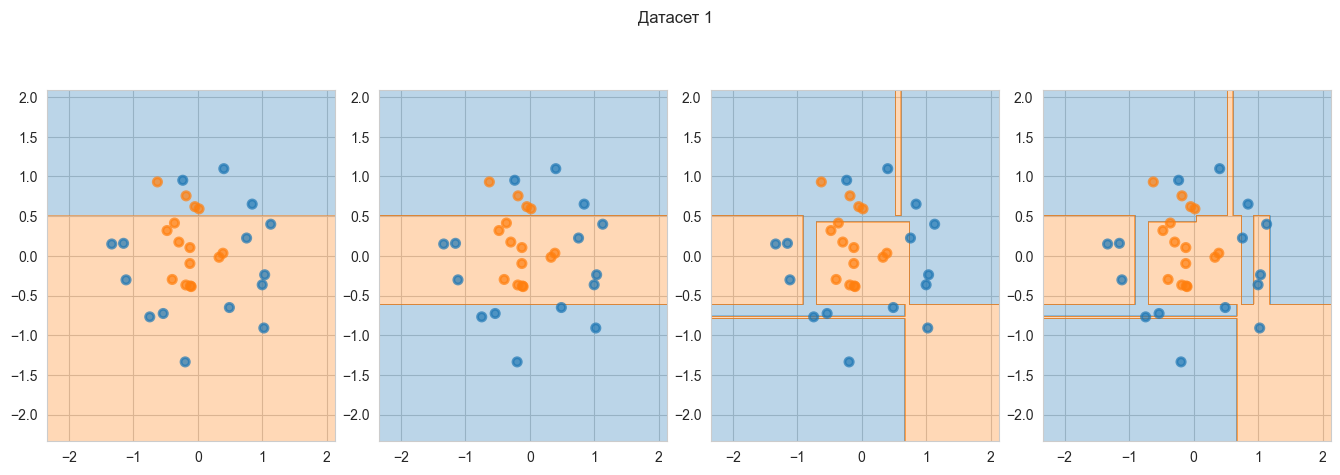

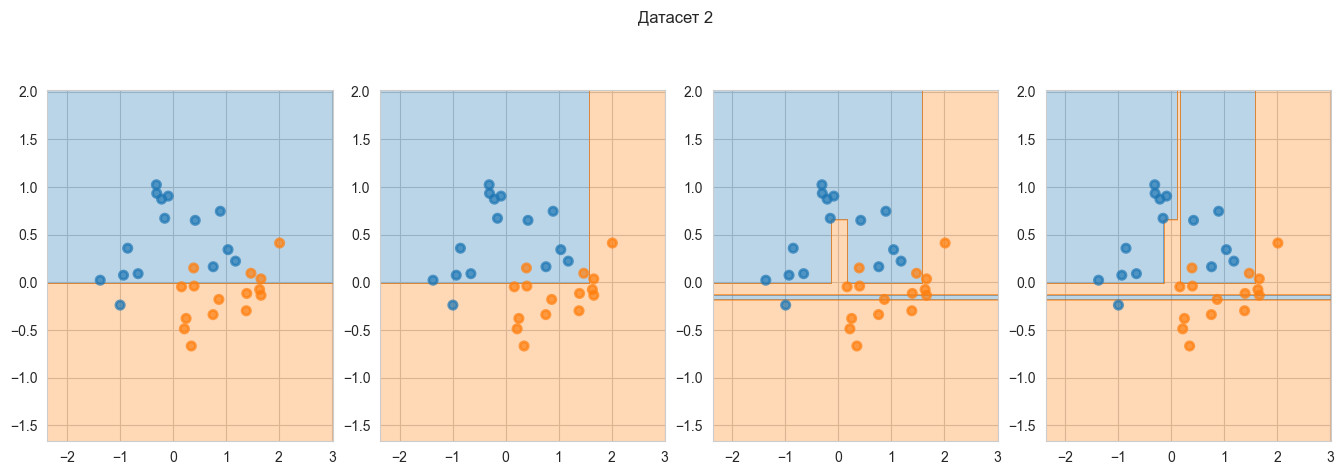

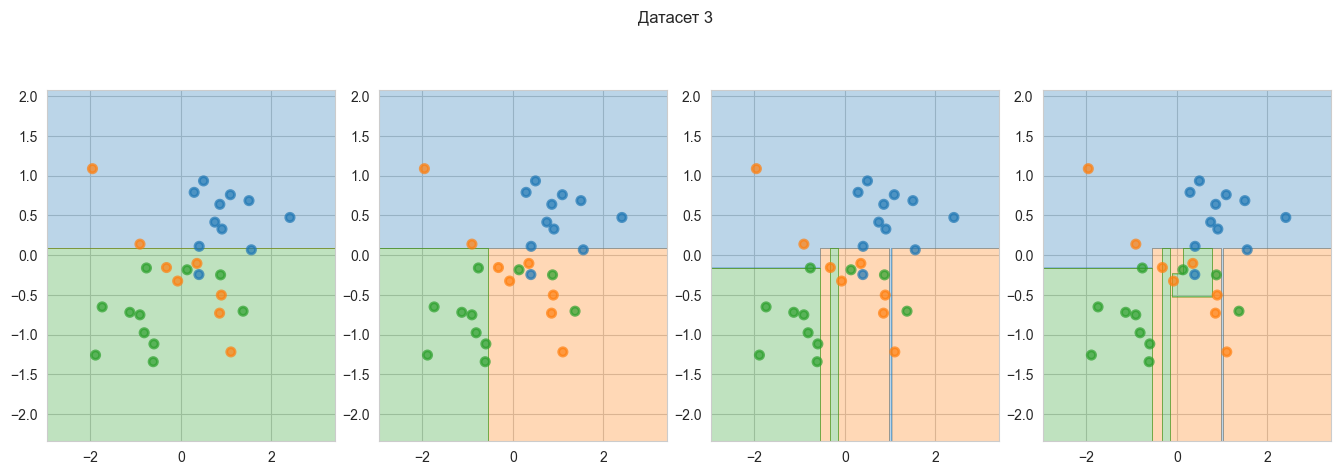

In [209]:
### без бонуса потому что я не конченый 
params = [1, 2, 5, 10] # подвигаем max_depth 
for i in range(3):
    fig, axes = plt.subplots(1, len(params), figsize=(14, 5))
    fig.suptitle(f'Датасет {i+1}')
    X, y = datasets[i]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=52)
    for j in range(len(params)):
        tree = DecisionTreeClassifier(max_depth=params[j])
        tree.fit(X_train, y_train)
        y_pred_train = tree.predict(X_train)
        y_pred_test = tree.predict(X_test)
        print(f'датасет {i+1}, max_depth = {params[j]}: accuracy train = {accuracy_score(y_train, y_pred_train)}, accuracy test = {accuracy_score(y_test, y_pred_test)}')
        plt.sca(axes[j])
        plot_surface(tree, X_test, y_test)
    print()

датасет 1, min_samples_leaf = 1: accuracy train = 1.0, accuracy test = 0.6666666666666666
датасет 1, min_samples_leaf = 5: accuracy train = 0.9, accuracy test = 0.8666666666666667
датасет 1, min_samples_leaf = 10: accuracy train = 0.8571428571428571, accuracy test = 0.7
датасет 1, min_samples_leaf = 20: accuracy train = 0.6714285714285714, accuracy test = 0.7333333333333333

датасет 2, min_samples_leaf = 1: accuracy train = 1.0, accuracy test = 0.8
датасет 2, min_samples_leaf = 5: accuracy train = 0.9714285714285714, accuracy test = 0.8666666666666667
датасет 2, min_samples_leaf = 10: accuracy train = 0.8285714285714286, accuracy test = 0.8333333333333334
датасет 2, min_samples_leaf = 20: accuracy train = 0.8285714285714286, accuracy test = 0.8333333333333334

датасет 3, min_samples_leaf = 1: accuracy train = 1.0, accuracy test = 0.6666666666666666
датасет 3, min_samples_leaf = 5: accuracy train = 0.9285714285714286, accuracy test = 0.7333333333333333
датасет 3, min_samples_leaf = 10: 

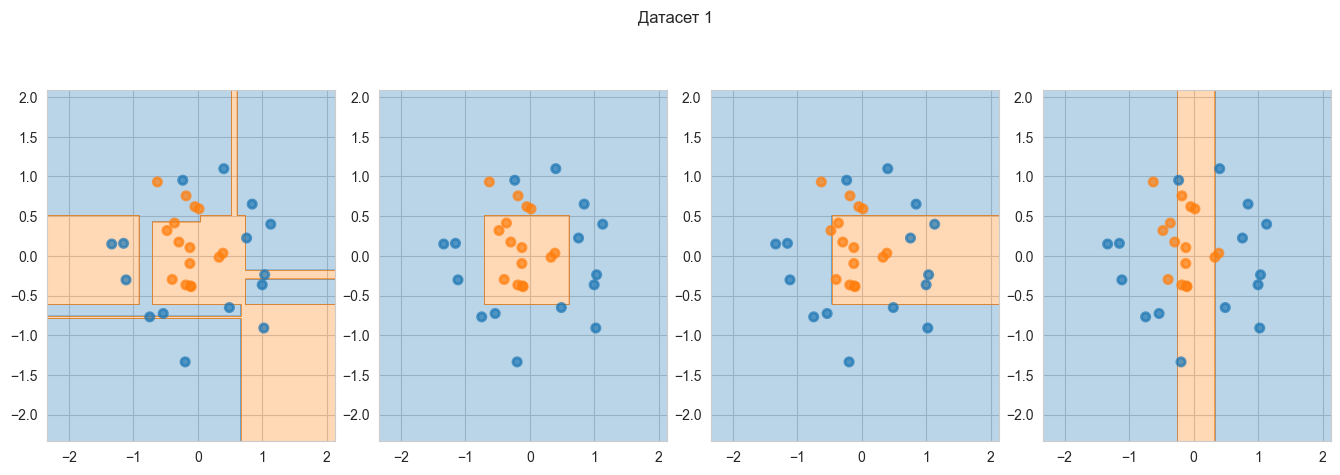

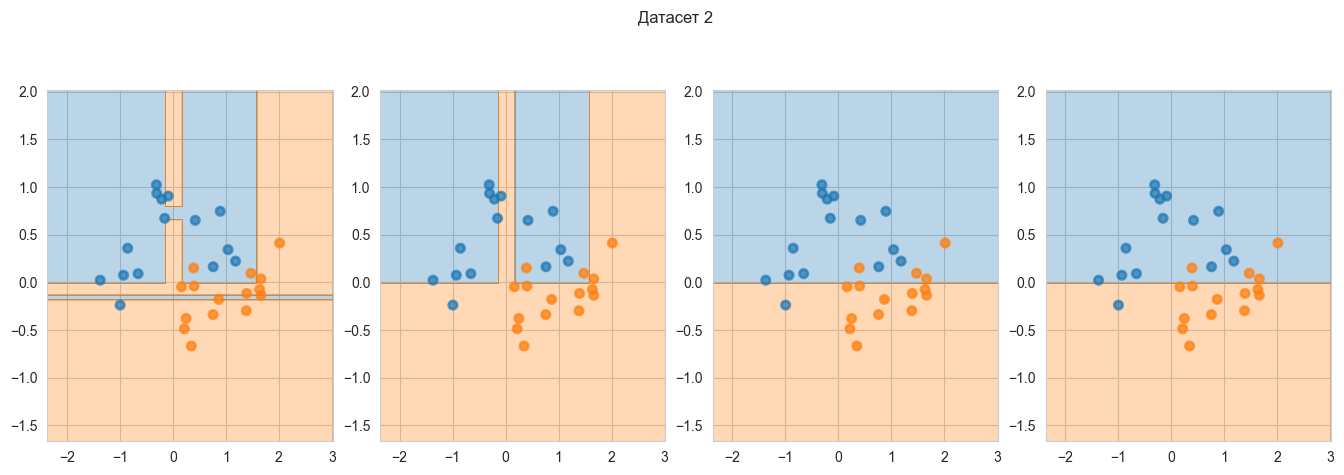

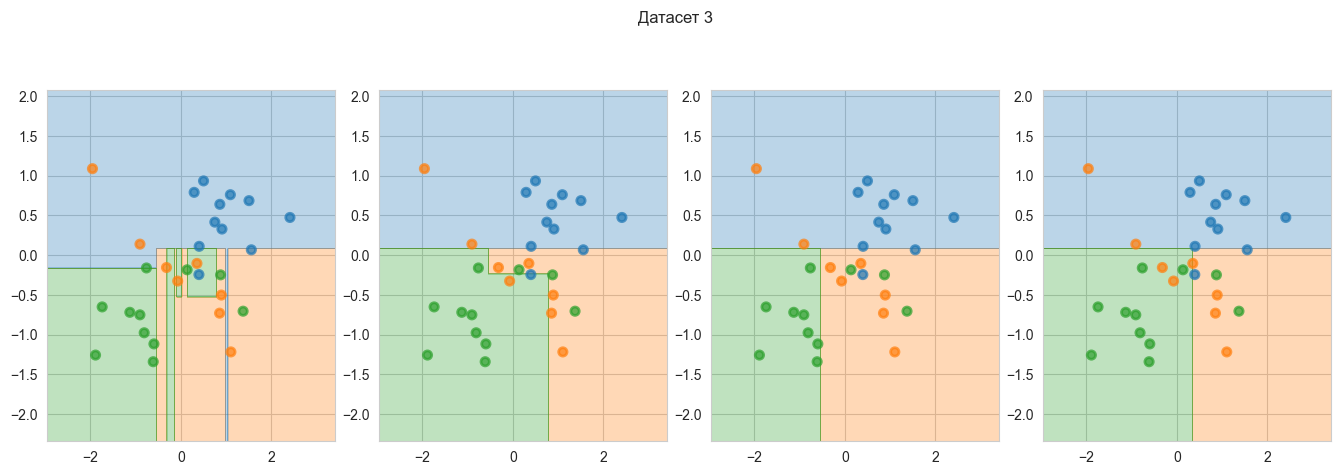

In [210]:
params = [1, 5, 10, 20] # подвигаем min_samples_leaf 
for i in range(3):
    fig, axes = plt.subplots(1, len(params), figsize=(14, 5))
    fig.suptitle(f'Датасет {i+1}')
    X, y = datasets[i]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=52)
    for j in range(len(params)):
        tree = DecisionTreeClassifier(min_samples_leaf=params[j])
        tree.fit(X_train, y_train)
        y_pred_train = tree.predict(X_train)
        y_pred_test = tree.predict(X_test)
        print(f'датасет {i+1}, min_samples_leaf = {params[j]}: accuracy train = {accuracy_score(y_train, y_pred_train)}, accuracy test = {accuracy_score(y_test, y_pred_test)}')
        plt.sca(axes[j])
        plot_surface(tree, X_test, y_test)
    print()

__Ответ:__ Как видно, чем меньше min_samples_leaf и чем больше max_depth, тем выше accuracy на тренировочной и ниже accuracy на тестовой, то есть тогда дерево сильно переобучается и теряет обобщающую способность. Но в то же время если задать слишком маленький max_depth и высокий min_samples_leaf, то деревья будут глупенькими и accuracy и на трейне и на тесте будет маленькая. Поэтому нужно соблюдать баланс между гиперпараметрами и подбирать их в зависимости от сложности задачи и специфики датасета 

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/homeworks-practice/homework-practice-05-trees/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

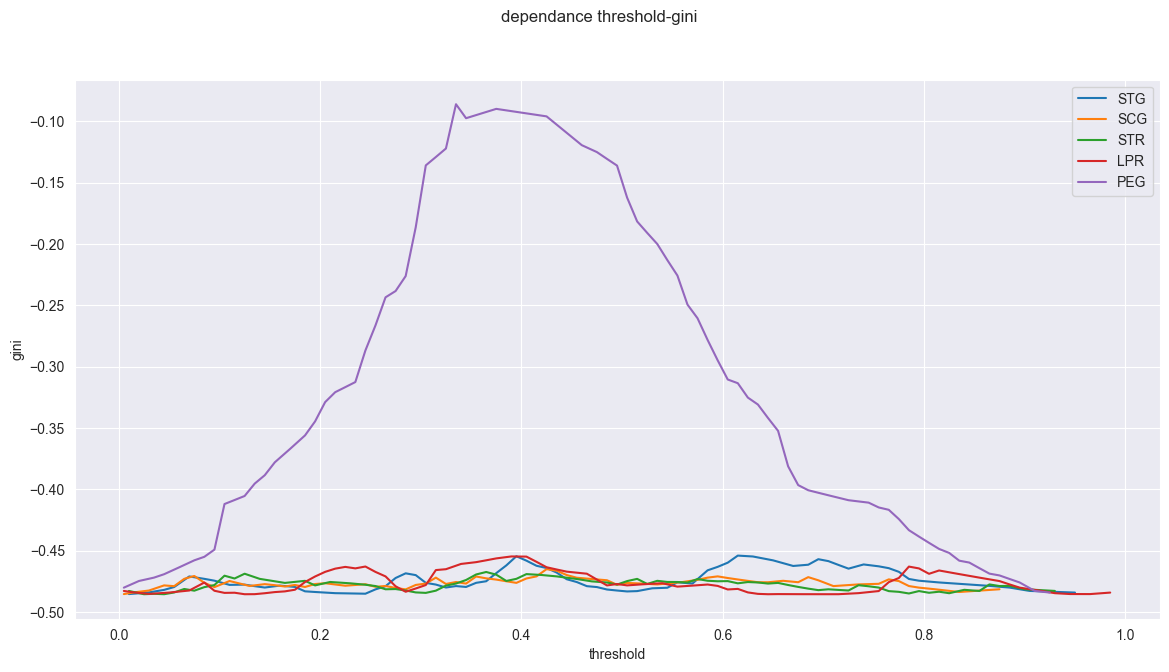

In [211]:
import importlib
import hw5code
importlib.reload(hw5code)
from hw5code import find_best_split
import seaborn as sns
sns.set_style('darkgrid')

fig, ax = plt.subplots(1, 1, figsize=(14, 7))

fig.suptitle('dependance threshold-gini')

students = pd.read_csv('students.csv')
X = students.drop(['UNS'], axis=1)
y = students['UNS']
for i, col in enumerate(X.columns):
    t, g, _, _ = find_best_split(X.iloc[:, i], y.to_numpy())
    sns.lineplot(x=t, y=g, ax=ax, label=col).set(xlabel='threshold', ylabel='gini')

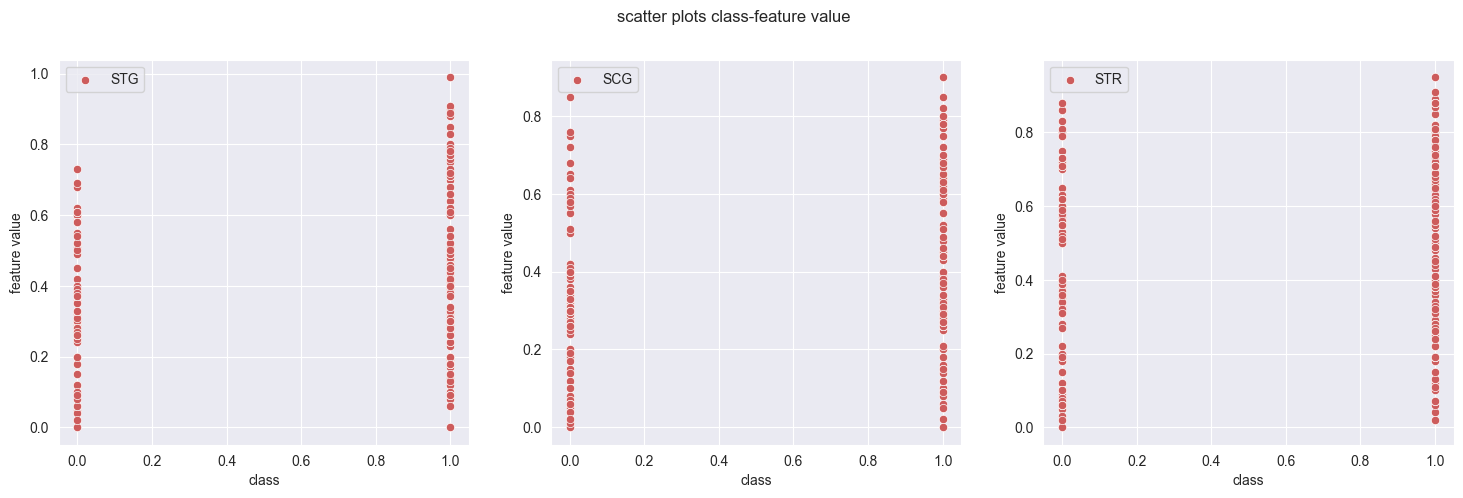

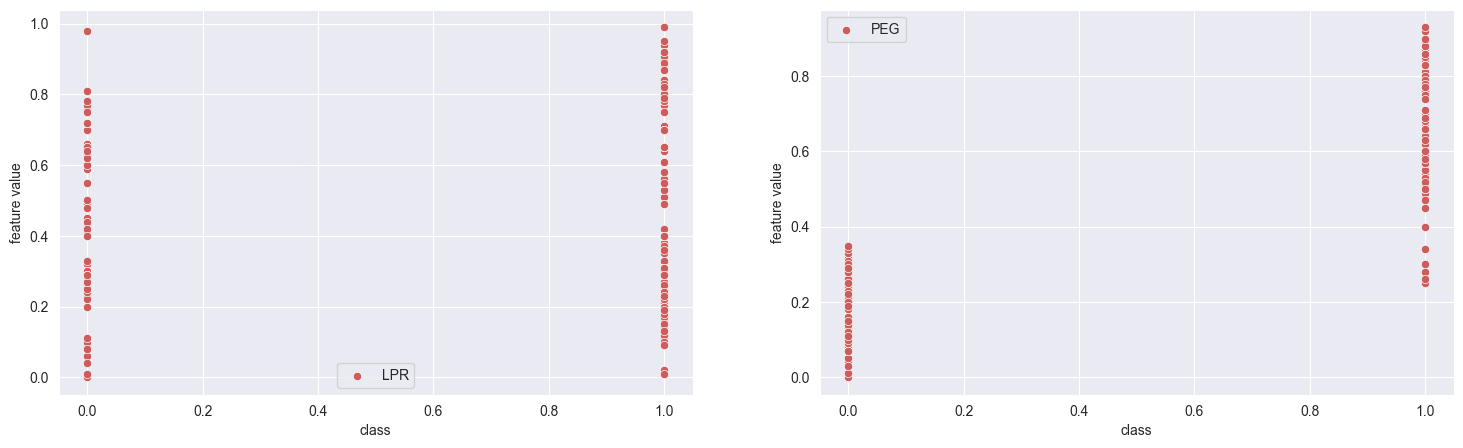

In [212]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
fig1, ax1 = plt.subplots(1, 2, figsize=(18, 5))

fig.suptitle('scatter plots class-feature value')

for i, col in enumerate(X.columns):
    if i < 3:
        sns.scatterplot(x=y, y=X[col], ax=ax[i], label=col, c='indianred').set(ylabel='feature value', xlabel='class')
    else:
        sns.scatterplot(x=y, y=X[col], ax=ax1[i - 3], label=col, c='indianred').set(ylabel='feature value', xlabel='class')

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:** Очевидно, что стоит делать разбиение по признаку PEG, так как при оптимальном пороге значение критерия Джини максимально, то есть мы добиваемся максимальной относительно других однородности объектов в левых и правых потомках после такого разбиения 

По scatter-графикам видно, что PEG как раз лучше всего может быть разделен на кластеры по мере увеличения значения фичей.

Такая кривая имеет вид симметричного горба, который в максимуме, то есть когда можно почти идеально раделить объекты близка к нулю, что соответствует идеально однородному разбиению. То есть вероятность выбора пары разных классов стремится или в идеале вообще равна нулю.

Признаки, по которым деление почти невозможно имеют пологие кривые, близкие к -0.5

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (лежит на гитхабе вместе с заданием), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [213]:
from hw5code import DecisionTree
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

importlib.reload(hw5code)

mushrooms = pd.read_csv('agaricus-lepiota.data')
for i in range(mushrooms.shape[1]):
    mushrooms.iloc[:, i] = le.fit_transform(mushrooms.iloc[:, i])

mushrooms1 = mushrooms.sample(mushrooms.shape[0] // 2, random_state=52)
mushrooms_2 = mushrooms.drop(mushrooms1.index)

y = mushrooms1['p'].to_numpy()
X = mushrooms1.drop(['p'], axis=1).to_numpy()

feature_types = ['categorical' for i in range(X.shape[1])]
tree = DecisionTree(feature_types)
tree.fit(X, y)

X_2 = mushrooms_2.drop(['p'], axis=1).to_numpy()
y_2 = mushrooms_2['p'].to_numpy()

prediction = tree.predict(X_2)

print(f'{accuracy_score(y_2.astype(int), prediction):0.3f}') #почему-то в y_2 типы были object поэтому скастить в инт пришлось 

0.999


Получили собственно почти единицу

__Задание 8. (1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (https://github.com/esokolov/ml-course-hse/blob/master/2024-fall/homework-practice/homework-practice-05-trees/tic-tac-toe-endgame.csv).

In [214]:
importlib.reload(hw5code)
tic_tac_toe = pd.read_csv('tic-tac-toe-endgame.csv')
for i in range(tic_tac_toe.shape[1]):
    tic_tac_toe.iloc[:, i] = le.fit_transform(tic_tac_toe.iloc[:, i])

tic_tac_toe1 = tic_tac_toe.sample(tic_tac_toe.shape[0] // 2, random_state=32)
tic_tac_toe_2 = tic_tac_toe.drop(tic_tac_toe1.index)

y = tic_tac_toe1['V10'].to_numpy()
X = tic_tac_toe1.drop(['V10'], axis=1).to_numpy()

X_2 = tic_tac_toe_2.drop(['V10'], axis=1).to_numpy()
y_2 = tic_tac_toe_2['V10'].to_numpy()

feature_types = ['categorical' for _ in range(X.shape[1])]

n = 20


depths = np.arange(1, n)
splits = np.arange(1, n)
leaves = np.arange(1, n)

depths_accurcacy = []
splits_accurcacy = []
leaves_accurcacy = []


for i in range(1, n):
    tree1 = DecisionTree(feature_types, max_depth=i)
    tree2 = DecisionTree(feature_types, min_samples_split=i)
    tree3 = DecisionTree(feature_types, min_samples_leaf=i)
    tree1.fit(X, y)
    tree2.fit(X, y)
    tree3.fit(X, y)
    prediction1 = tree1.predict(X_2)
    prediction2 = tree2.predict(X_2)
    prediction3 = tree3.predict(X_2)
    depths_accurcacy.append(accuracy_score(y_2.astype(int), prediction1))
    splits_accurcacy.append(accuracy_score(y_2.astype(int), prediction2))
    leaves_accurcacy.append(accuracy_score(y_2.astype(int), prediction3))


[Text(0.5, 1.0, 'min_samples_leaf-accuracy dependance'),
 Text(0.5, 0, 'min_samples_leaf'),
 Text(0, 0.5, 'accuracy')]

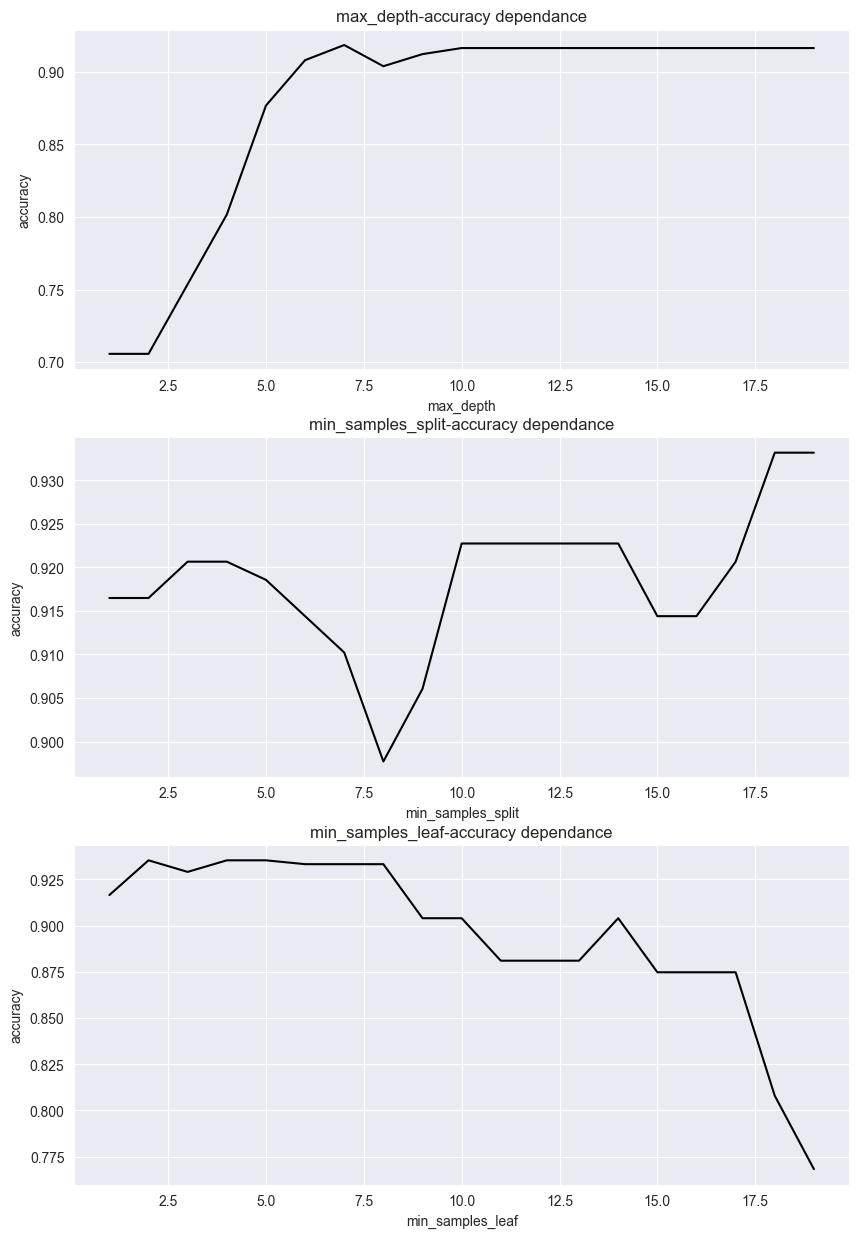

In [215]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15))
sns.lineplot(x=depths, y=depths_accurcacy, ax=axes[0], c='black').set(title='max_depth-accuracy dependance', xlabel='max_depth', ylabel='accuracy')
sns.lineplot(x=splits, y=splits_accurcacy, ax=axes[1], c='black').set(title='min_samples_split-accuracy dependance', xlabel='min_samples_split', ylabel='accuracy')
sns.lineplot(x=leaves, y=leaves_accurcacy, ax=axes[2], c='black').set(title='min_samples_leaf-accuracy dependance', xlabel='min_samples_leaf', ylabel='accuracy')

__Задание 9. (до 3-х баллов)__

Реализуйте класс `LinearRegressionTree`:

 - Если вам удобно, можете сделать его наследуемым от `DecisionTree` и переопределить только необходимые методы. Можете добавить новые — как вам нравится.
 - В листьях находятся не константные предсказания, а линейные модели (можно использовать из библиотеки `sklearn`).
 - Ваша реализация должна решать задачу __регрессии__, поэтому для поиска оптимального разбиения нужно написать новую функцию.
 - **Максимум 1.8 балла, если**:
   - В качестве критерия для разбиения считаете среднее квадратное/абсолютное отклонение
   - Перебираете все пороги
   - Ваша реализация строится как обычное решающее дерево для регрессии, но в листьях линейные модели.
   - Есть поддержка параметра max_depth
 - **Максимум три балла, если выполнено следующее**:
     - Для разбиения перебираются не все пороги. Пороги выбираются из значений признаков, разбитых на квантили.
     - Для разбиении выбирается порог, который минимизирует суммарную ошибку линейных моделей после разбиения: $$\text{loss} = \frac{n_{left}}{n} \cdot \text{loss}_{left} + \frac{n_{right}}{n} \cdot \text{loss}_{right}$$ (Разумеется, для оценки этих ошибок вам надо будет строить много линейных моделей, это не дисперсии. В качестве функционала ошибки возьмите MAE или MSE)
     - Есть поддержка параметров max_depth, min_samples_split, min_samples_leaf

__Задание 10. (1 балл)__

Проведите эксперименты с реализованным вами линейным деревом на любом подходящем датасете из sklearn (https://scikit-learn.org/1.5/datasets/real_world.html), который вам нравится. Подберите лучшие гиперпараметры (max_depth и остальные, если вы их реализовывали). Сравните ваше дерево со стандартным деревом для регрессии из sklearn, для него тоже подберите гиперпараметры.

In [216]:
from sklearn.datasets import fetch_california_housing
from hw5code import LinearRegressionTree
from sklearn.metrics import mean_squared_error
housing = fetch_california_housing()
X = housing['data']
y = housing['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
feature_types = ['real' for _ in range(X_train.shape[1])]
tree = LinearRegressionTree(feature_types, max_depth=3, min_samples_split=225, min_samples_leaf=300, quantiles=10) #проверяю на рандомном 
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mse

0.3791207014612726

Вроде даже что-то работает 

In [217]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
param_grid = {
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [3, 5, 7]
}
tree = LinearRegressionTree(feature_types)
grid = GridSearchCV(tree, param_grid, scoring='neg_mean_squared_error', cv=3, n_jobs=-1)
grid.fit(X_train, y_train)

y_pred = grid.best_estimator_.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE for LinearRegressionTree: {mse}")
print(f"r2 for LinearRegressionTree: {r2}")
print(f"Best params: {grid.best_params_}")

MSE for LinearRegressionTree: 0.3533824230053806
r2 for LinearRegressionTree: 0.7307644765279087
Best params: {'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 2}


Теперь посмотрим на библиотечный

In [218]:
from sklearn.tree import DecisionTreeRegressor
param_grid = {
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [3, 5, 7]
}

tree = DecisionTreeRegressor()
grid = GridSearchCV(tree, param_grid, scoring='neg_mean_squared_error', cv=3, n_jobs=-1)
grid.fit(X_train, y_train)

y_pred = grid.best_estimator_.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE for RegressionTree: {mse}")
print(f"r2 for RegressionTree: {r2}")

MSE for RegressionTree: 0.5210801561811792
r2 for RegressionTree: 0.6029986793705844


Библиотечный лох объелся блох

Посмотрите, что будет, если обучить ваше дерево на данных, которые сгенерированы внизу. Нарисуйте график с предсказаниями и таргетами на всей выборке, сравните с обычным деревом.

Напишите, какие достоинства и недостатки вы видите у реализованного вами линейного дерева.

In [219]:
n_samples = 3_000
x = np.linspace(0, 5, n_samples).reshape(-1, 1)
y = np.sin(x.flatten()) + np.random.normal(0, 0.1, n_samples) * np.random.normal(0, 1, n_samples)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.95, random_state=0x4b524f4c2d562d53544f594c4f % (2 ** 32 - 1))

feature_types = ['real' for _ in range(x_train.shape[1])]

my_tree = LinearRegressionTree(max_depth=4, min_samples_leaf=3, min_samples_split=2, feature_types=feature_types)
my_tree.fit(x_train, y_train)
y_pred = my_tree.predict(x_test)

sklearn_tree = DecisionTreeRegressor(max_depth=4, min_samples_leaf=3, min_samples_split=2)
sklearn_tree.fit(x_train, y_train)
y_pred_skleran = sklearn_tree.predict(x_test)

<Axes: title={'center': 'sklearn tree'}>

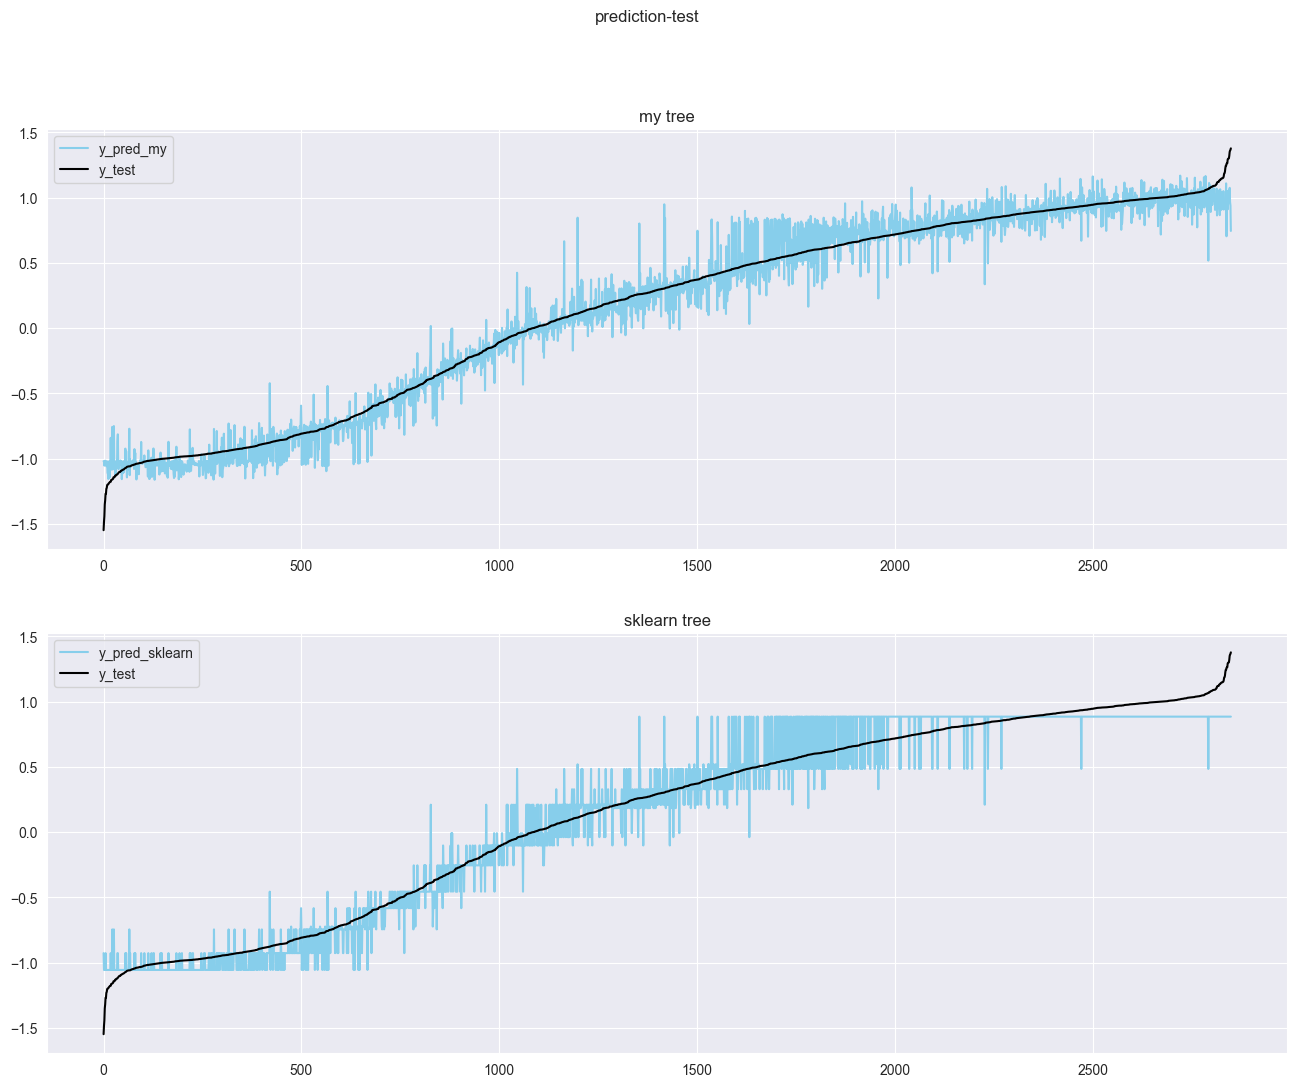

In [220]:
fig, ax = plt.subplots(2, 1, figsize=(16, 12))
fig.suptitle('prediction-test')
right_indexes = np.argsort(y_test) #отсортируем чтоб красиво и понятно блин быо 
sns.lineplot(x=np.arange(len(y_test)), y=y_pred[right_indexes], ax=ax[0], label='y_pred_my', c='skyblue').set(title='my tree')
sns.lineplot(x=np.arange(len(y_test)), y=y_test[right_indexes], ax=ax[0], label='y_test', c='black')
sns.lineplot(x=np.arange(len(y_test)), y=y_pred_skleran[right_indexes], ax=ax[1], label='y_pred_sklearn', c='skyblue').set(title='sklearn tree')
sns.lineplot(x=np.arange(len(y_test)), y=y_test[right_indexes], ax=ax[1], label='y_test', c='black')

In [221]:
print(f'my r2 score:={r2_score(y_test, y_pred)}')
print(f'sklearn r2 score:={r2_score(y_test, y_pred_skleran)}')

my r2 score:=0.973213761155943
sklearn r2 score:=0.9616767886929827


**Ответ:** Из-за того, что мы такие умные и классные и в листах строим регрессии, дерево лучше улавливает гладкие линейные зависимости несмотря на то, что оно кусочно постоянное. Библиотечное же дерево берет просто среднее и поэтому получает более грубую оценку и соответственно чуть меньший r2. Достоинства нашей реализации очевидно в более высоком качестве так как по сути мы объединяем плюсы деревьев, то есть способности замечать сложные закономерности и регрессии, которая помогает лучше предсказывать для листьев, в которых данные максимально однородны по критерию impurity, но за это стоит поплатиться скоростью и памятью очевидно

Вставьте что угодно, описывающее ваши впечатления от этого задания:

Оч крутая домашка, наконец-то не фит предикт и EDAAAAAAA бесконечные, но я измотан и замучен 